In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Question 1. Number of goals scored per club(PLOT A GRAPH)

In [2]:
df=pd.read_csv('goals.csv')

In [3]:
df.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    int64 
 12  match_played   183 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 18.7+ KB


In [5]:
df.shape

(183, 13)

In [6]:
df.isnull().sum()

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [7]:
df.drop(['serial'],axis=1,inplace=True)
df.head()

,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [8]:
df.rename({'player_name':'Player Name', 'club':'Club', 'position':'Position', 'goals':'Goals', 'right_foot':'Right_foot',
       'left_foot':'Left_foot', 'headers':'Headers', 'others':'Others', 'inside_area':'Inside_area', 'outside_areas':'Outside_areas',
       'penalties':'Penalties', 'match_played':'Match_played'},axis=1,inplace=True)

In [9]:
df.head()

,Player Name,Club,Position,Goals,Right_foot,Left_foot,Headers,Others,Inside_area,Outside_areas,Penalties,Match_played
0,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [10]:
df2=pd.crosstab(df['Club'],df['Goals'])
df2.head()

Goals,1,2,3,4,5,6,7,8,11,13,15
Club,,,,,,,,,,,
Ajax,3,2,1,0,0,0,0,0,1,0,0
Atalanta,9,0,1,0,0,0,0,0,0,0,0
Atlético,5,0,0,1,0,0,0,0,0,0,0
Barcelona,2,0,0,0,0,0,0,0,0,0,0
Bayern,2,1,1,1,0,1,0,0,0,1,0


In [11]:
df2.reset_index(inplace=True)
df2

Goals,Club,1,2,3,4,5,6,7,8,11,13,15
0,Ajax,3,2,1,0,0,0,0,0,1,0,0
1,Atalanta,9,0,1,0,0,0,0,0,0,0,0
2,Atlético,5,0,0,1,0,0,0,0,0,0,0
3,Barcelona,2,0,0,0,0,0,0,0,0,0,0
4,Bayern,2,1,1,1,0,1,0,0,0,1,0
5,Benfica,4,0,1,0,0,1,0,0,0,0,0
6,Beşiktaş,3,0,0,0,0,0,0,0,0,0,0
7,Chelsea,8,3,1,1,0,0,0,0,0,0,0
8,Club Brugge,0,1,1,0,0,0,0,0,0,0,0
9,Dortmund,1,0,3,0,0,0,0,0,0,0,0


In [12]:
df2['TGSPclub']=df2[1]+df2[2]+df2[3]+df2[4]+df2[5]+df2[6]+df2[7]+df2[8]+df2[11]+df2[13]+df2[15]
df2

Goals,Club,1,2,3,4,5,6,7,8,11,13,15,TGSPclub
0,Ajax,3,2,1,0,0,0,0,0,1,0,0,7
1,Atalanta,9,0,1,0,0,0,0,0,0,0,0,10
2,Atlético,5,0,0,1,0,0,0,0,0,0,0,6
3,Barcelona,2,0,0,0,0,0,0,0,0,0,0,2
4,Bayern,2,1,1,1,0,1,0,0,0,1,0,7
5,Benfica,4,0,1,0,0,1,0,0,0,0,0,6
6,Beşiktaş,3,0,0,0,0,0,0,0,0,0,0,3
7,Chelsea,8,3,1,1,0,0,0,0,0,0,0,13
8,Club Brugge,0,1,1,0,0,0,0,0,0,0,0,2
9,Dortmund,1,0,3,0,0,0,0,0,0,0,0,4


No handles with labels found to put in legend.


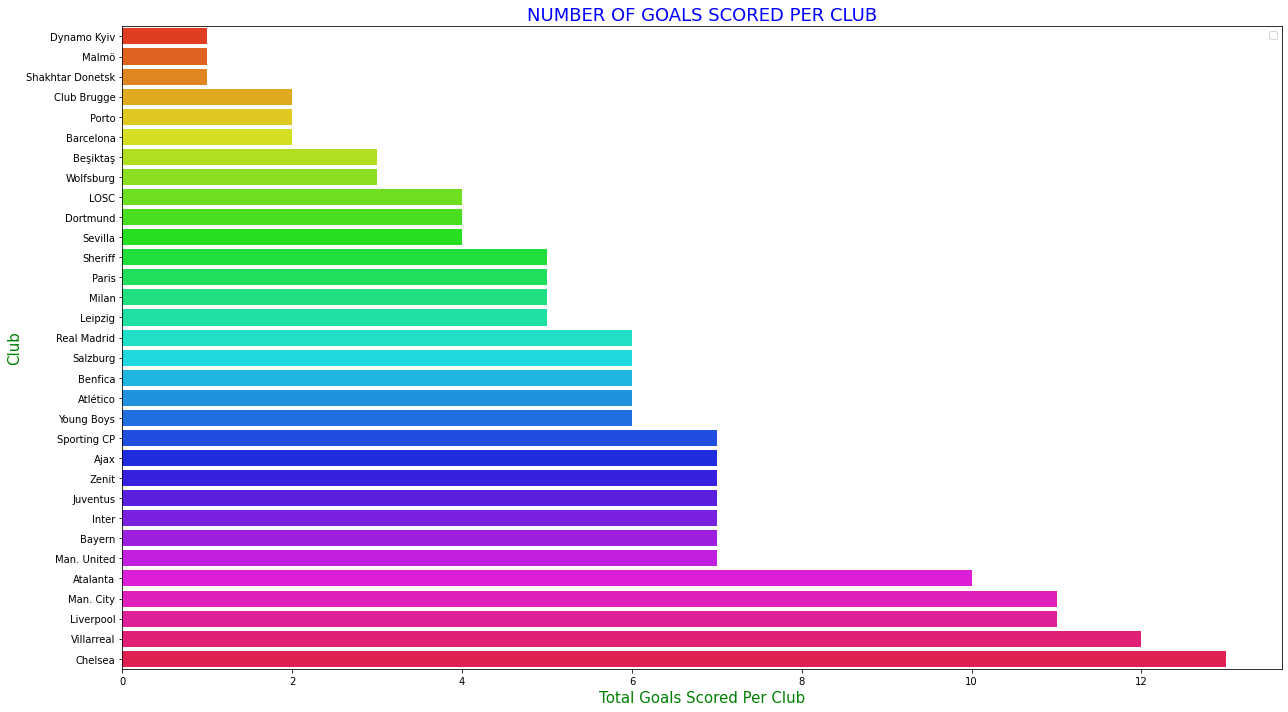

In [13]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='TGSPclub', y="Club",
            data=df2,
            palette='hsv',
#            order=df5.sort_values('TGSPclub',ascending=False).Club)#in descending order
           order=df2.sort_values('TGSPclub').Club)#in ascending order
# set labels
plt.ylabel("Club",color='g',size=15)
plt.xlabel("Total Goals Scored Per Club",color='g',size=15)
plt.title("NUMBER OF GOALS SCORED PER CLUB",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("Goals_Scored_per_club_barplot_Seaborn_Python.png", dpi=100)

In [14]:
#fig=px.bar(x=df2['Club'],y=df2['TGSPclub'],
#           title='NUMBER OF GOALS SCORED PER CLUB',color=df2['Club'],text=df2['TGSPclub'],
#           labels={'x':'Club','y':'TGSPclub'},color_continuous_scale='Portland')
#fig.show()

# Question 2. Average playing time per player per club(PLOT A GRAPH)

In [15]:
df_apt=pd.read_csv('key_stats.csv')
df_apt.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [16]:
df_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       747 non-null    object
 1   club              747 non-null    object
 2   position          747 non-null    object
 3   minutes_played    747 non-null    int64 
 4   match_played      747 non-null    int64 
 5   goals             747 non-null    int64 
 6   assists           747 non-null    int64 
 7   distance_covered  747 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.8+ KB


In [17]:
df_apt.isnull().sum()

player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
dtype: int64

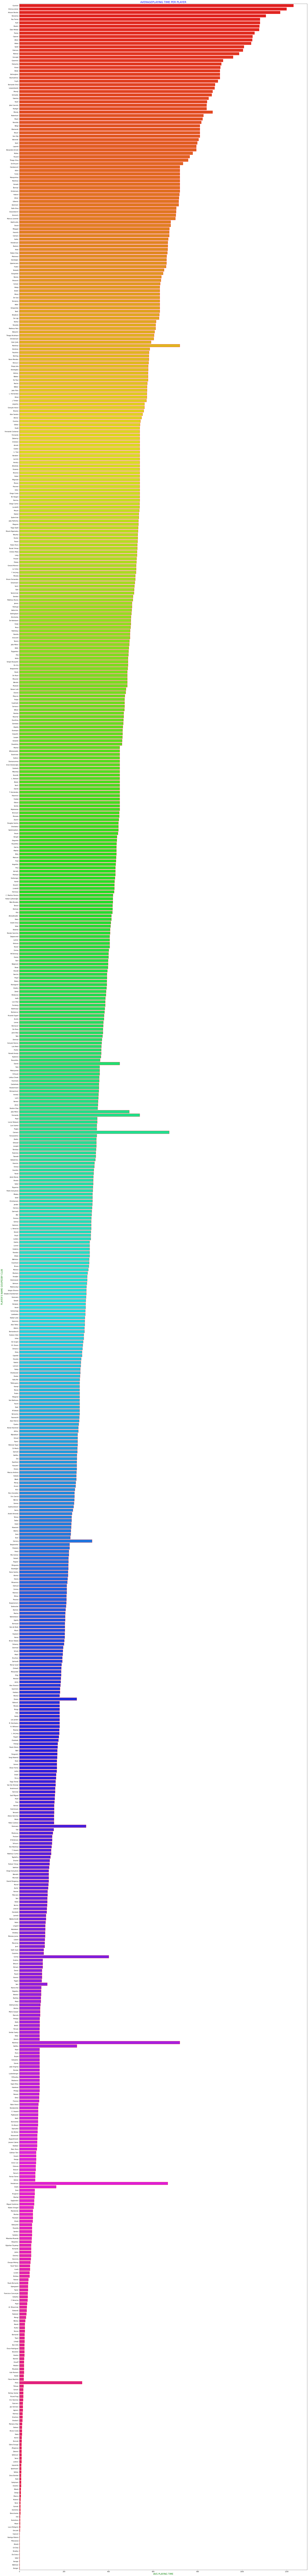

In [18]:
plt.figure(figsize=(30,250))
# make barplot
sns.barplot(x='minutes_played', y="player_name",
            data=df_apt,
            palette='hsv',
            ci=None,
            edgecolor='red',
            estimator=np.max,
            order=df_apt.sort_values('minutes_played',ascending=False).player_name)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("PLAYER\'S NAME GOUPEDBY CLUB",color='g',size=15)
plt.xlabel("AVG PLAYING TIME",color='g',size=15)
plt.title("AVERAGEPLAYING TIME PER PLAYER",color='b',size=18)
plt.tight_layout()
#plt.legend()
plt.savefig("AVG_Playing_Time_barplot_Seaborn_Python.png", dpi=100)

In [19]:
#df_apt['avg_playing_time']=round(df_apt['minutes_played']/df_apt['match_played'])

In [20]:
#df_apt.head()

In [21]:
#df_apt0=df_apt.copy()
#df_apt0.head()

In [22]:
#df_apt0.set_index(['club','player_name'],inplace=True)
#df_apt0.head()

In [23]:
#df_apt0['club'].unique()

In [24]:
#df_apt0

In [25]:
#df_apt0.reset_index(inplace=True)
#df_apt0.head()

In [26]:
#df_apt_ext=df_apt0[['club','player_name','avg_playing_time']]
#df_apt_ext

In [27]:
#df_apt_ext.set_index(['club','player_name'],inplace=True)
#df_apt_ext.head()

In [28]:
#df_apt_ext=df_apt0[['club','player_name','avg_playing_time']].set_index('club',append=True)
#df_apt_ext.head()

In [29]:
#df0 = df_apt0[["player_name", "avg_playing_time","club"]].set_index("club", append=True).avg_playing_time.unstack("club")

# notice here I scale down the BRK-A column so that it will be at the same scale as other columns
#high['BRK-A'] = high['BRK-A']/1000
#df0.head()

In [30]:
#df_apt_ext.reset_index(inplace=True)

In [31]:
#fig, ax = plt.subplots()
#club = df_apt_ext.club.unique()
#df_apt_ext.reset_index().groupby('club').plot(x='player_name', y='avg_playing_time', ax=ax)
#plt.legend(club)
#plt.show()
#fig, ax = plt.subplots()
#club = df_apt_ext.club.unique()
#fig=px.bar(df_apt_ext.reset_index().groupby('club').plot(x='player_name', y='avg_playing_time',
#px.bar(df_apt_ext.reset_index().groupby('club').plot(x='player_name', y='avg_playing_time'),
#           title='NUMBER OF MINUTES PLAYED PER PLAYER',color=df_apt_ext['club'],text=df_apt_ext['player_name'],
#           labels={'x':'CLUB/PLAYER','y':'AVG MINUTES PLAYED'},color_continuous_scale='Portland')
#fig.show()

In [32]:
#fig=px.bar(x=df_apt_ext['player_name'],y=df_apt_ext['avg_playing_time'],
#           title='NUMBER OF MINUTES PLAYED PER PLAYER',color=df_apt_ext['club'],text=df_apt_ext['avg_playing_time'],
#           labels={'x':'PLAYER\'S NAME GOUPEDBY CLUB WITH COLOURS','y':'AVG PLAYING TIME'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

# Question 3. PLOT AND RETURN A TABLE FOR Top 10 scorers

In [33]:
df=pd.read_csv('goals.csv')

In [34]:
df.head(15)

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6
5,5,Mahrez,Man. City,Midfielder,7,1,4,2,0,7,0,2,12
6,7,Mbappé,Paris,Forward,6,6,0,0,0,6,0,0,8
7,7,Núñez,Benfica,Forward,6,5,0,1,0,6,0,1,10
8,7,Ronaldo,Man. United,Forward,6,5,0,1,0,4,2,0,7
9,7,Danjuma,Villarreal,Midfielder,6,3,3,0,0,6,0,1,11


In [35]:
df[df['goals']>20]
df.sort_values('serial',ascending=True,inplace=True)
df.set_index('serial',inplace=True)

In [36]:
df.head(10)

,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
serial,,,,,,,,,,,,
1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6
5,Mahrez,Man. City,Midfielder,7,1,4,2,0,7,0,2,12
7,Sané,Bayern,Midfielder,6,1,5,0,0,3,3,0,10
7,Danjuma,Villarreal,Midfielder,6,3,3,0,0,6,0,1,11
7,Ronaldo,Man. United,Forward,6,5,0,1,0,4,2,0,7


In [37]:
dftop10=df.sort_values('goals',ascending=False)
Top_10=dftop10.iloc[0:10]
Top_10

,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
serial,,,,,,,,,,,,
1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6
5,Mahrez,Man. City,Midfielder,7,1,4,2,0,7,0,2,12
7,Ronaldo,Man. United,Forward,6,5,0,1,0,4,2,0,7
7,Mbappé,Paris,Forward,6,6,0,0,0,6,0,0,8
7,Núñez,Benfica,Forward,6,5,0,1,0,6,0,1,10


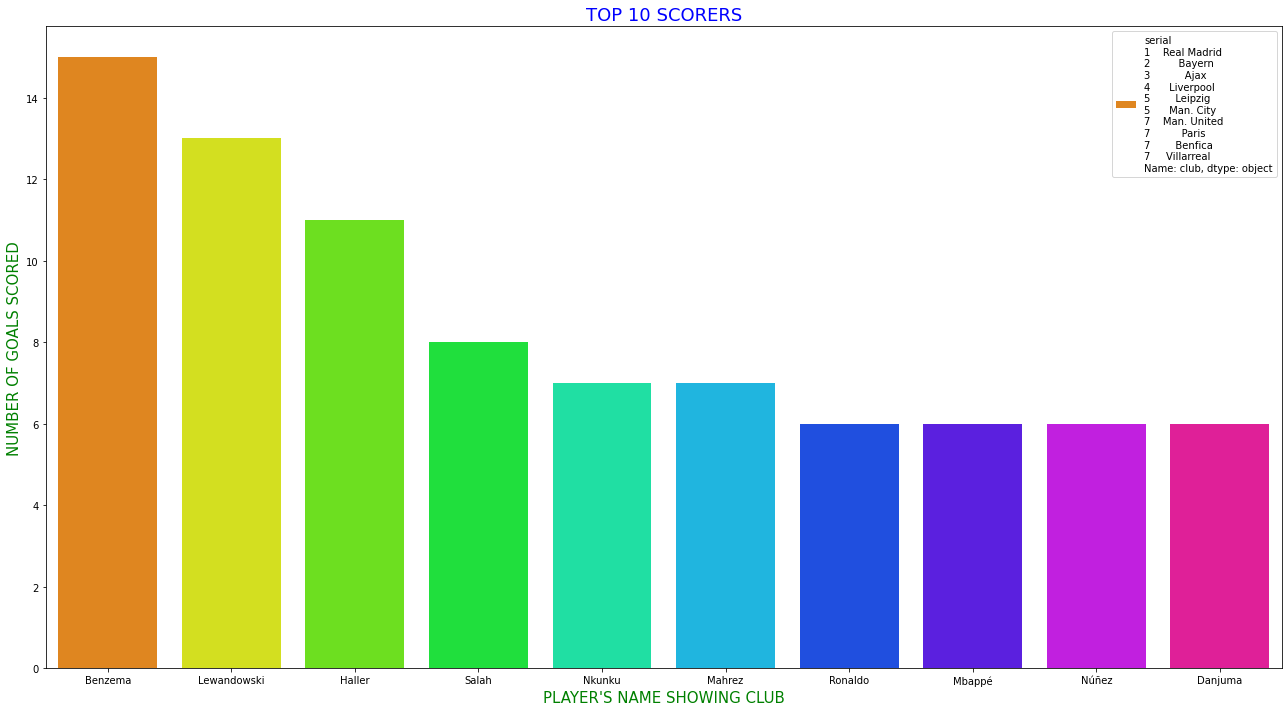

In [38]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='player_name', y="goals",
            data=Top_10,
            label=Top_10['club'],
            palette='hsv',
            estimator=np.max,
            order=Top_10.sort_values('goals',ascending=False).player_name)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("NUMBER OF GOALS SCORED",color='g',size=15)
plt.xlabel("PLAYER\'S NAME SHOWING CLUB",color='g',size=15)
plt.title("TOP 10 SCORERS",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("Top_10_Scorers_barplot_Seaborn_Python.png", dpi=100)

In [39]:
#fig=px.bar(x=Top_10['player_name'],y=Top_10['goals'],
#           title='TOP 10 SCORERS',color=Top_10['club'],text=Top_10['player_name'],
#           labels={'x':'PLAYER\'S NAME SHOWING CLUB WITH COLOURS','y':'NUMBER OF GOALS SCORED'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

# Question 4. Top 15 Teams in terms of goals(PLOT A GRAPH AND TABLE)

In [40]:
df.head(20)

,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
serial,,,,,,,,,,,,
1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6
5,Mahrez,Man. City,Midfielder,7,1,4,2,0,7,0,2,12
7,Sané,Bayern,Midfielder,6,1,5,0,0,3,3,0,10
7,Danjuma,Villarreal,Midfielder,6,3,3,0,0,6,0,1,11
7,Ronaldo,Man. United,Forward,6,5,0,1,0,4,2,0,7


In [41]:
topteams=pd.crosstab(df['club'],df['goals'])
topteams

goals,1,2,3,4,5,6,7,8,11,13,15
club,,,,,,,,,,,
Ajax,3,2,1,0,0,0,0,0,1,0,0
Atalanta,9,0,1,0,0,0,0,0,0,0,0
Atlético,5,0,0,1,0,0,0,0,0,0,0
Barcelona,2,0,0,0,0,0,0,0,0,0,0
Bayern,2,1,1,1,0,1,0,0,0,1,0
Benfica,4,0,1,0,0,1,0,0,0,0,0
Beşiktaş,3,0,0,0,0,0,0,0,0,0,0
Chelsea,8,3,1,1,0,0,0,0,0,0,0
Club Brugge,0,1,1,0,0,0,0,0,0,0,0


In [42]:
topteams['club total goals']=topteams[1]+topteams[2]+topteams[3]+topteams[4]+topteams[5]
+topteams[6]+topteams[7]+topteams[8]+topteams[11]+topteams[11]+topteams[15]
topteams

goals,1,2,3,4,5,6,7,8,11,13,15,club total goals
club,,,,,,,,,,,,
Ajax,3,2,1,0,0,0,0,0,1,0,0,6
Atalanta,9,0,1,0,0,0,0,0,0,0,0,10
Atlético,5,0,0,1,0,0,0,0,0,0,0,6
Barcelona,2,0,0,0,0,0,0,0,0,0,0,2
Bayern,2,1,1,1,0,1,0,0,0,1,0,5
Benfica,4,0,1,0,0,1,0,0,0,0,0,5
Beşiktaş,3,0,0,0,0,0,0,0,0,0,0,3
Chelsea,8,3,1,1,0,0,0,0,0,0,0,13
Club Brugge,0,1,1,0,0,0,0,0,0,0,0,2


In [43]:
top15teams=topteams.sort_values('club total goals',ascending=False)
top15teams

goals,1,2,3,4,5,6,7,8,11,13,15,club total goals
club,,,,,,,,,,,,
Chelsea,8,3,1,1,0,0,0,0,0,0,0,13
Villarreal,8,3,0,0,0,1,0,0,0,0,0,11
Man. City,4,2,3,1,0,0,1,0,0,0,0,10
Atalanta,9,0,1,0,0,0,0,0,0,0,0,10
Liverpool,6,1,0,1,2,0,0,1,0,0,0,10
Zenit,5,2,0,0,0,0,0,0,0,0,0,7
Juventus,4,2,1,0,0,0,0,0,0,0,0,7
Sporting CP,3,2,1,1,0,0,0,0,0,0,0,7
Inter,6,0,1,0,0,0,0,0,0,0,0,7


In [44]:
Top_15_Teams=top15teams.iloc[0:15]
Top_15_Teams

goals,1,2,3,4,5,6,7,8,11,13,15,club total goals
club,,,,,,,,,,,,
Chelsea,8,3,1,1,0,0,0,0,0,0,0,13
Villarreal,8,3,0,0,0,1,0,0,0,0,0,11
Man. City,4,2,3,1,0,0,1,0,0,0,0,10
Atalanta,9,0,1,0,0,0,0,0,0,0,0,10
Liverpool,6,1,0,1,2,0,0,1,0,0,0,10
Zenit,5,2,0,0,0,0,0,0,0,0,0,7
Juventus,4,2,1,0,0,0,0,0,0,0,0,7
Sporting CP,3,2,1,1,0,0,0,0,0,0,0,7
Inter,6,0,1,0,0,0,0,0,0,0,0,7


In [45]:
Top_15_Teams.reset_index(inplace=True)
Top_15_Teams

goals,club,1,2,3,4,5,6,7,8,11,13,15,club total goals
0,Chelsea,8,3,1,1,0,0,0,0,0,0,0,13
1,Villarreal,8,3,0,0,0,1,0,0,0,0,0,11
2,Man. City,4,2,3,1,0,0,1,0,0,0,0,10
3,Atalanta,9,0,1,0,0,0,0,0,0,0,0,10
4,Liverpool,6,1,0,1,2,0,0,1,0,0,0,10
5,Zenit,5,2,0,0,0,0,0,0,0,0,0,7
6,Juventus,4,2,1,0,0,0,0,0,0,0,0,7
7,Sporting CP,3,2,1,1,0,0,0,0,0,0,0,7
8,Inter,6,0,1,0,0,0,0,0,0,0,0,7
9,Young Boys,5,1,0,0,0,0,0,0,0,0,0,6


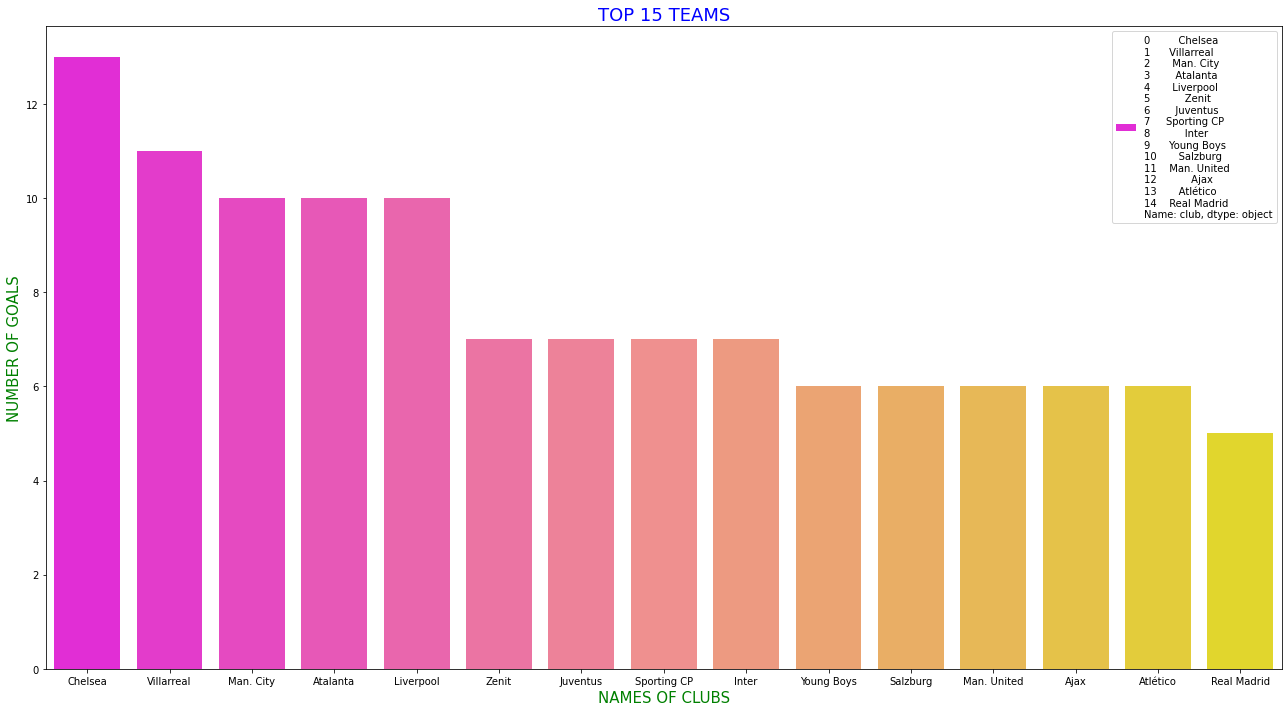

In [46]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='club', y="club total goals",
            data=Top_15_Teams,
            label=Top_15_Teams['club'],
            palette='spring',
            estimator=np.max,
            order=Top_15_Teams.sort_values('club total goals',ascending=False).club)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("NUMBER OF GOALS",color='g',size=15)
plt.xlabel("NAMES OF CLUBS",color='g',size=15)
plt.title("TOP 15 TEAMS",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("Top_15_teams_barplot_Seaborn_Python.png", dpi=100)

In [47]:
#fig=px.bar(x=Top_15_Teams['club'],y=Top_15_Teams['club total goals'],
#           title='TOP 15 TEAMS',color=Top_15_Teams['club'],text=Top_15_Teams['club'],
#           labels={'x':'NAMES OF CLUBS','y':'NUMBER OF GOALS'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

# Personal Question : Goal types analysis (All Put Together:PLOT A GRAPH)

In [48]:
gta=pd.read_csv('goals.csv')

In [49]:
gta.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [50]:
gta1=gta.copy()
gta1.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [51]:
gta1.set_index('player_name',inplace=True)
gta1.head()

,serial,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
player_name,,,,,,,,,,,,
Benzema,1,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
Lewandowski,2,Bayern,Forward,13,8,3,1,1,13,0,3,10
Haller,3,Ajax,Forward,11,3,4,3,1,11,0,1,8
Salah,4,Liverpool,Forward,8,0,8,0,0,7,1,1,13
Nkunku,5,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [52]:
#gta1.reset_index(inplace=True)
#gta1.head()

In [53]:
gta1.drop(['serial','club','goals','position','match_played'],axis=1,inplace=True)
gta1

,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
player_name,,,,,,,
Benzema,11,1,3,0,13,2,3
Lewandowski,8,3,1,1,13,0,3
Haller,3,4,3,1,11,0,1
Salah,0,8,0,0,7,1,1
Nkunku,3,1,3,0,7,0,0
...,...,...,...,...,...,...,...
Yansané,0,0,1,0,1,0,0
Yakhshiboev,0,0,1,0,1,0,0
Messias Junior,0,0,1,0,1,0,0


In [54]:
#gta1.set_index('player_name',append=True,inplace=True)
#gta1.head()

In [55]:
#gta1.reset_index(inplace=True)
#gta1

In [56]:
#gta1.drop('level_0',axis=1,inplace=True)
#gta1.head()

In [57]:
#gta1.index

In [58]:
#gta2=gta1.style.hide_index()
#gta2

In [59]:
#gta1.set_index('player_name',inplace=True)

In [60]:
#gta2.reset_index(inplace=True)
#gta2=gta1.transpose()
#gta2

In [61]:
#gta2.reset_index(inplace=True)

In [62]:
#gta3=gta2.rename(columns={'index':'goal_analysis'})
#gta1

In [63]:
#gta1.reset_index(inplace=True)
#gta1.head()

In [64]:
gta1.loc['total_analysis']=(sum(gta1['right_foot']),sum(gta1['left_foot']),sum(gta1['headers']),sum(gta1['others']),
sum(gta1['inside_area']),sum(gta1['outside_areas']),sum(gta1['penalties']))

gta1


,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
player_name,,,,,,,
Benzema,11,1,3,0,13,2,3
Lewandowski,8,3,1,1,13,0,3
Haller,3,4,3,1,11,0,1
Salah,0,8,0,0,7,1,1
Nkunku,3,1,3,0,7,0,0
...,...,...,...,...,...,...,...
Yakhshiboev,0,0,1,0,1,0,0
Messias Junior,0,0,1,0,1,0,0
Morato,0,0,1,0,1,0,0


In [65]:
#gta2.reset_index(inplace=True)
gta2=gta1.transpose()
gta2

player_name,Benzema,Lewandowski,Haller,Salah,Nkunku,Mahrez,Mbappé,Núñez,Ronaldo,Danjuma,...,Larin,Kuzyaev,Montero,Choupo-Moting,Yansané,Yakhshiboev,Messias Junior,Morato,Pedro Porro,total_analysis
right_foot,11,8,3,0,3,1,6,5,5,3,...,0,0,0,0,0,0,0,0,0,178
left_foot,1,3,4,8,1,4,0,0,0,3,...,0,0,0,0,0,0,0,0,0,127
headers,3,1,3,0,3,2,0,1,1,0,...,1,1,1,1,1,1,1,1,0,60
others,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
inside_area,13,13,11,7,7,7,6,6,4,6,...,1,1,1,1,1,1,1,1,1,332
outside_areas,2,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,38
penalties,3,3,1,1,0,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,36


In [66]:
gta2.reset_index(inplace=True)
#gta3=gta2.rename(columns={'index':'goal_analysis'})
gta2

player_name,index,Benzema,Lewandowski,Haller,Salah,Nkunku,Mahrez,Mbappé,Núñez,Ronaldo,...,Larin,Kuzyaev,Montero,Choupo-Moting,Yansané,Yakhshiboev,Messias Junior,Morato,Pedro Porro,total_analysis
0,right_foot,11,8,3,0,3,1,6,5,5,...,0,0,0,0,0,0,0,0,0,178
1,left_foot,1,3,4,8,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,127
2,headers,3,1,3,0,3,2,0,1,1,...,1,1,1,1,1,1,1,1,0,60
3,others,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,inside_area,13,13,11,7,7,7,6,6,4,...,1,1,1,1,1,1,1,1,1,332
5,outside_areas,2,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,38
6,penalties,3,3,1,1,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,36


In [67]:
gta3=gta2.rename(columns={'index':'goal_analysis'})
gta3

player_name,goal_analysis,Benzema,Lewandowski,Haller,Salah,Nkunku,Mahrez,Mbappé,Núñez,Ronaldo,...,Larin,Kuzyaev,Montero,Choupo-Moting,Yansané,Yakhshiboev,Messias Junior,Morato,Pedro Porro,total_analysis
0,right_foot,11,8,3,0,3,1,6,5,5,...,0,0,0,0,0,0,0,0,0,178
1,left_foot,1,3,4,8,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,127
2,headers,3,1,3,0,3,2,0,1,1,...,1,1,1,1,1,1,1,1,0,60
3,others,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,inside_area,13,13,11,7,7,7,6,6,4,...,1,1,1,1,1,1,1,1,1,332
5,outside_areas,2,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,38
6,penalties,3,3,1,1,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,36


In [68]:
#gta=px.data.gapminder()
#fig=px.scatter(gta3,x='goal_analysis',y='goals',animation_frame='match_played',animation_group='club',size='pop',color='continental',
#               hover_name='player',log_x=True,size_max=55,range_x=[100,100000],range_y=[1,20])
#fig.show()

In [69]:
#df_apt_ext=df_apt0[['club','player_name','avg_playing_time']]
#df_apt_ext

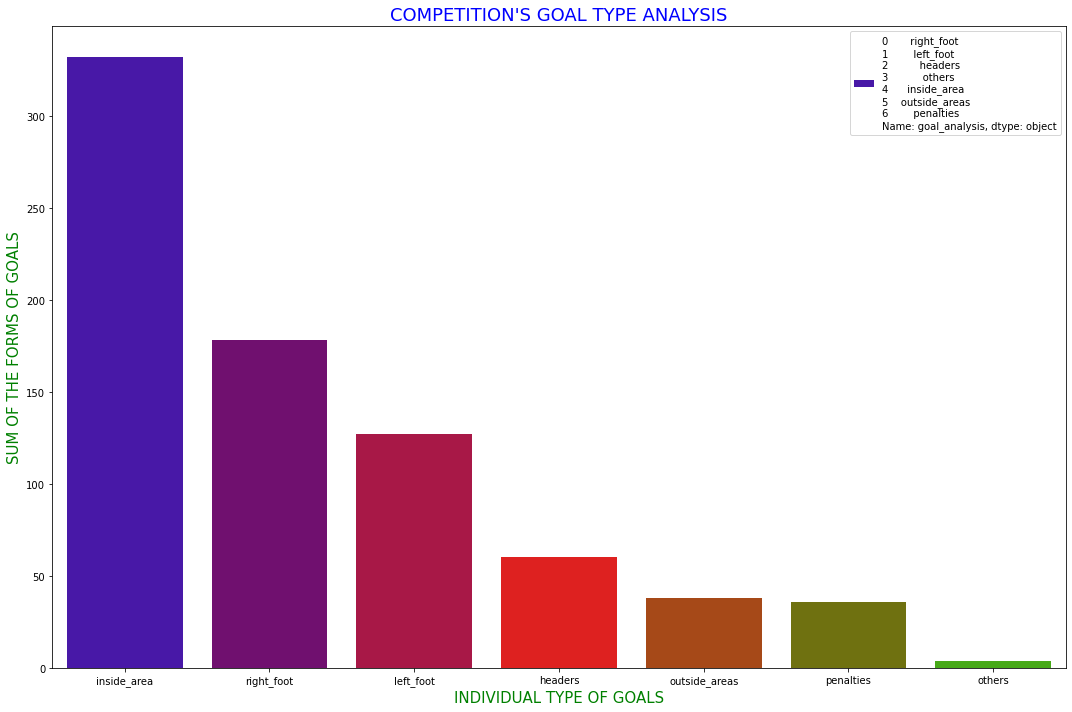

In [70]:
plt.figure(figsize=(15,10))
# make barplot
sns.barplot(x='goal_analysis', y="total_analysis",
            data=gta3,
            label=gta3['goal_analysis'],
            palette='brg',
            ci=None,
            estimator=np.max,
            order=gta3.sort_values('total_analysis',ascending=False).goal_analysis)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("SUM OF THE FORMS OF GOALS",color='g',size=15)
plt.xlabel("INDIVIDUAL TYPE OF GOALS",color='g',size=15)
plt.title("COMPETITION\'S GOAL TYPE ANALYSIS",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("goal_type_analysis_barplot_Seaborn_Python.png", dpi=100)

In [71]:
#fig=px.bar(x=gta3['goal_analysis'],y=gta3['total_analysis'],
#           title='COMPETITION\'S GOAL TYPE ANALYSIS',color=gta3['goal_analysis'],text=gta3['total_analysis'],
#           labels={'x':'INDIVIDUAL TYPE OF GOALS AND THEIR INDIVIDUAL SUM','y':'SUM OF THE FORMS OF GOALS'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

# Question 5. Goal types analysis (How scored:PLOT A GRAPH

In [72]:
Gta=pd.read_csv('goals.csv')
Gta.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [73]:
Gta1=Gta.copy()
Gta1.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [74]:
Gta1.set_index('player_name',inplace=True)
Gta1.head()

,serial,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
player_name,,,,,,,,,,,,
Benzema,1,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
Lewandowski,2,Bayern,Forward,13,8,3,1,1,13,0,3,10
Haller,3,Ajax,Forward,11,3,4,3,1,11,0,1,8
Salah,4,Liverpool,Forward,8,0,8,0,0,7,1,1,13
Nkunku,5,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [75]:
Gta1.drop(['serial','club','goals','position','match_played','inside_area','outside_areas','penalties'],axis=1,inplace=True)
Gta1.head()

,right_foot,left_foot,headers,others
player_name,,,,
Benzema,11,1,3,0
Lewandowski,8,3,1,1
Haller,3,4,3,1
Salah,0,8,0,0
Nkunku,3,1,3,0


In [76]:
Gta1.loc['sum_how_scored']=(sum(Gta1['right_foot']),sum(Gta1['left_foot']),sum(Gta1['headers']),sum(Gta1['others']))
Gta1

,right_foot,left_foot,headers,others
player_name,,,,
Benzema,11,1,3,0
Lewandowski,8,3,1,1
Haller,3,4,3,1
Salah,0,8,0,0
Nkunku,3,1,3,0
...,...,...,...,...
Yakhshiboev,0,0,1,0
Messias Junior,0,0,1,0
Morato,0,0,1,0


In [77]:
Gta2=Gta1.transpose()
Gta2.reset_index(inplace=True)
#gta3=gta2.rename(columns={'index':'goal_analysis'})
Gta3=Gta2.rename(columns={'index':'goal_analysis'})
Gta3

player_name,goal_analysis,Benzema,Lewandowski,Haller,Salah,Nkunku,Mahrez,Mbappé,Núñez,Ronaldo,...,Larin,Kuzyaev,Montero,Choupo-Moting,Yansané,Yakhshiboev,Messias Junior,Morato,Pedro Porro,sum_how_scored
0,right_foot,11,8,3,0,3,1,6,5,5,...,0,0,0,0,0,0,0,0,0,178
1,left_foot,1,3,4,8,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,127
2,headers,3,1,3,0,3,2,0,1,1,...,1,1,1,1,1,1,1,1,0,60
3,others,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4


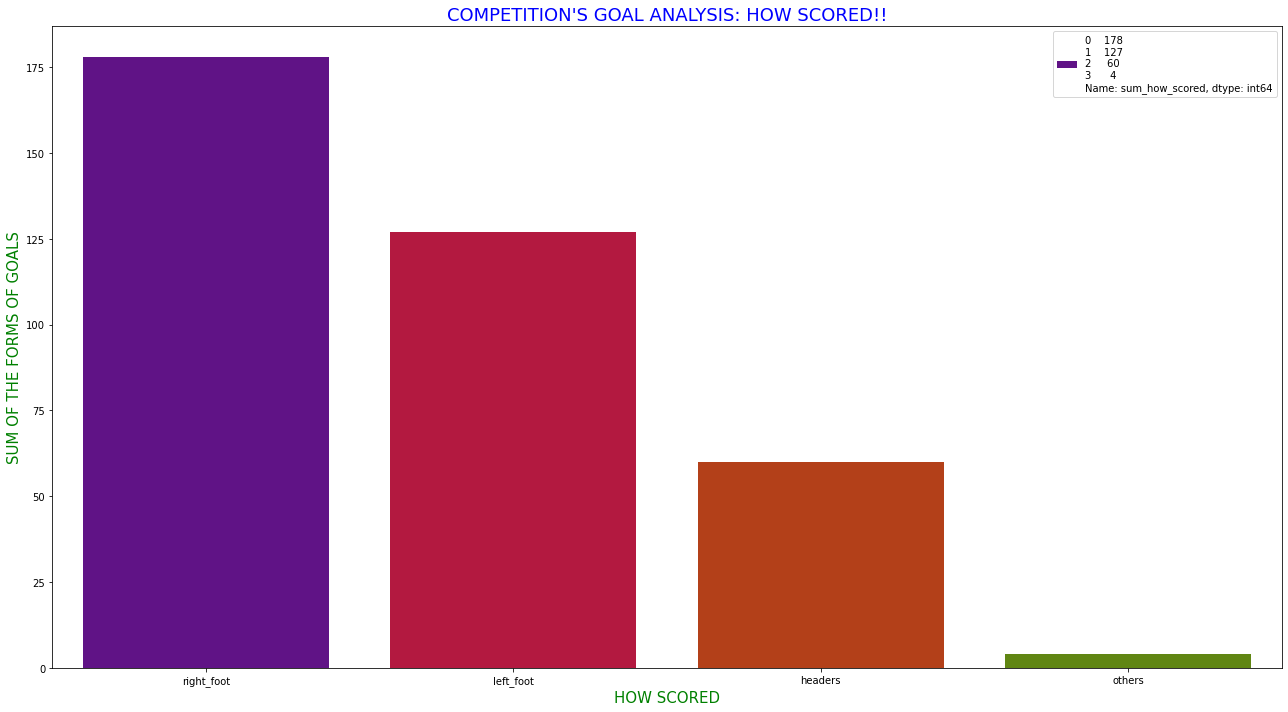

In [78]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='goal_analysis', y="sum_how_scored",
            data=Gta3,
            label=Gta3['sum_how_scored'],
            palette='brg',
            ci=None,
            estimator=np.max,
            order=Gta3.sort_values('sum_how_scored',ascending=False).goal_analysis)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("SUM OF THE FORMS OF GOALS",color='g',size=15)
plt.xlabel("HOW SCORED",color='g',size=15)
plt.title("COMPETITION\'S GOAL ANALYSIS: HOW SCORED!!",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("How_Scored_barplot_Seaborn_Python.png", dpi=100)

In [79]:
#fig=px.bar(x=Gta3['goal_analysis'],y=Gta3['sum_how_scored'],
#           title='COMPETITION\'S GOAL ANALYSIS: HOW SCORED!!',color=Gta3['goal_analysis'],text=Gta3['sum_how_scored'],
#           labels={'x':'HOW SCORED','y':'SUM OF THE FORMS OF GOALS'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

# Question 6. Goal types analysis (From where scored:PLOT A GRAPH)

In [80]:
#Gta=pd.read_csv('goals.csv')
#Gta.head()

#Gta1=Gta.copy()
#Gta1.head()

#Gta1.set_index('player_name',inplace=True)
#Gta1.head()


#Gta1.drop(['serial','club','goals','position','match_played','inside_area','outside_areas','penalties'],axis=1,inplace=True)
#Gta1.head()

#Gta1.loc['sum_how_scored']=(sum(Gta1['right_foot']),sum(Gta1['left_foot']),sum(Gta1['headers']),sum(Gta1['others']))
#Gta1

#Gta2=Gta1.transpose()
#Gta2.reset_index(inplace=True)
######gta3=gta2.rename(columns={'index':'goal_analysis'})
#Gta3=Gta2.rename(columns={'index':'goal_analysis'})
#Gta3

#fig=px.bar(x=Gta3['goal_analysis'],y=Gta3['sum_how_scored'],
#          title='COMPETITION\'S GOAL ANALYSIS: HOW SCORED!!',color=Gta3['goal_analysis'],text=Gta3['sum_how_scored'],
#           labels={'x':'HOW SCORED','y':'SUM OF THE FORMS OF GOALS'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

In [81]:
gta=pd.read_csv('goals.csv')
gta.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [82]:
gta1=gta.copy()
gta1.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [83]:
gta.set_index('player_name',inplace=True)
gta.head()

,serial,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
player_name,,,,,,,,,,,,
Benzema,1,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
Lewandowski,2,Bayern,Forward,13,8,3,1,1,13,0,3,10
Haller,3,Ajax,Forward,11,3,4,3,1,11,0,1,8
Salah,4,Liverpool,Forward,8,0,8,0,0,7,1,1,13
Nkunku,5,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [84]:
gta1.drop(['serial','club','goals','position','match_played','left_foot','right_foot','headers','others'],axis=1,inplace=True)
gta1.head()

,player_name,inside_area,outside_areas,penalties
0,Benzema,13,2,3
1,Lewandowski,13,0,3
2,Haller,11,0,1
3,Salah,7,1,1
4,Nkunku,7,0,0


In [85]:
gta1.set_index('player_name',inplace=True)
gta1

,inside_area,outside_areas,penalties
player_name,,,
Benzema,13,2,3
Lewandowski,13,0,3
Haller,11,0,1
Salah,7,1,1
Nkunku,7,0,0
...,...,...,...
Yansané,1,0,0
Yakhshiboev,1,0,0
Messias Junior,1,0,0


In [86]:
gta1.loc['sum_where_scored']=(sum(gta1['inside_area']),sum(gta1['outside_areas']),sum(gta1['penalties']))
gta1

,inside_area,outside_areas,penalties
player_name,,,
Benzema,13,2,3
Lewandowski,13,0,3
Haller,11,0,1
Salah,7,1,1
Nkunku,7,0,0
...,...,...,...
Yakhshiboev,1,0,0
Messias Junior,1,0,0
Morato,1,0,0


In [87]:
gta2=gta1.transpose()
gta2.reset_index(inplace=True)
######gta3=gta2.rename(columns={'index':'goal_analysis'})
gta3=gta2.rename(columns={'index':'goal_analysis'})
gta3


player_name,goal_analysis,Benzema,Lewandowski,Haller,Salah,Nkunku,Mahrez,Mbappé,Núñez,Ronaldo,...,Larin,Kuzyaev,Montero,Choupo-Moting,Yansané,Yakhshiboev,Messias Junior,Morato,Pedro Porro,sum_where_scored
0,inside_area,13,13,11,7,7,7,6,6,4,...,1,1,1,1,1,1,1,1,1,332
1,outside_areas,2,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,38
2,penalties,3,3,1,1,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,36


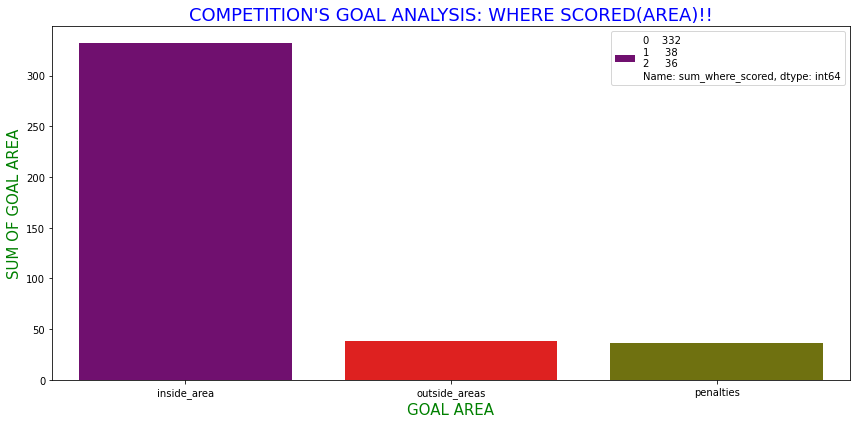

In [88]:
plt.figure(figsize=(12,6))
# make barplot
sns.barplot(x='goal_analysis', y="sum_where_scored",
            data=gta3,
            label=gta3['sum_where_scored'],
            palette='brg',
            ci=None,
            estimator=np.max,
            order=gta3.sort_values('sum_where_scored',ascending=False).goal_analysis)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("SUM OF GOAL AREA",color='g',size=15)
plt.xlabel("GOAL AREA",color='g',size=15)
plt.title("COMPETITION\'S GOAL ANALYSIS: WHERE SCORED(AREA)!!",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("Goal_Areas_barplot_Seaborn_Python.png", dpi=100)

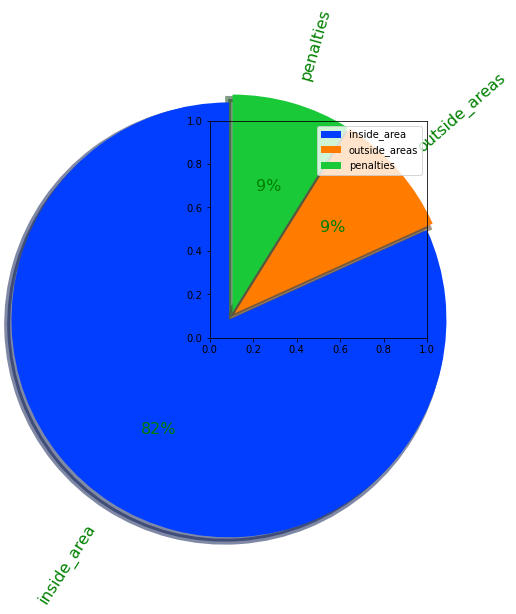

<Figure size 432x288 with 0 Axes>

In [89]:
data =gta3['sum_where_scored']
explode = [0.02,0.02,0.02]
labels =gta3['goal_analysis']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,
        colors = colors, 
        autopct = '%0.0f%%', 
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'Green','fontsize':16},
        wedgeprops = {'linewidth': 6},
        frame = 'true' ,
        center = (0.1,0.1),
        rotatelabels = 'true')
plt.legend()
plt.show()
plt.savefig("Pie_Goal_Areas_barplot_Seaborn_Python.png", dpi=100)

In [90]:
#fig=px.bar(x=gta3['goal_analysis'],y=gta3['sum_where_scored'],
#          title='COMPETITION\'S GOAL ANALYSIS: WHERE SCORED!!',color=gta3['goal_analysis'],text=gta3['sum_where_scored'],
#           labels={'x':'WHERE SCORED','y':'SUM OF WHERE SCORED GOALS'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

# Question 7. Goal types analysis (Player position:PLOT A GRAPH)

In [91]:
gta=pd.read_csv('goals.csv')
gta.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [92]:
Gta1=gta.copy()
Gta1.drop(['serial','club','goals','player_name','match_played'],axis=1,inplace=True)
Gta1.set_index('position',inplace=True)
Gta1.loc['total_goal_analysis']=(sum(Gta1['right_foot']),sum(Gta1['left_foot']),sum(Gta1['headers']),sum(Gta1['others']),
sum(Gta1['inside_area']),sum(Gta1['outside_areas']),sum(Gta1['penalties']))

Gta1

,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
position,,,,,,,
Forward,11,1,3,0,13,2,3
Forward,8,3,1,1,13,0,3
Forward,3,4,3,1,11,0,1
Forward,0,8,0,0,7,1,1
Midfielder,3,1,3,0,7,0,0
...,...,...,...,...,...,...,...
Forward,0,0,1,0,1,0,0
Forward,0,0,1,0,1,0,0
Defender,0,0,1,0,1,0,0


### Goal Ananlysis of Individual Fowards

In [93]:
#df.loc['forward'].loc['Men\'s Clothing']
fw=Gta1.loc['Forward']
fw

,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
position,,,,,,,
Forward,11,1,3,0,13,2,3
Forward,8,3,1,1,13,0,3
Forward,3,4,3,1,11,0,1
Forward,0,8,0,0,7,1,1
Forward,6,0,0,0,6,0,0
...,...,...,...,...,...,...,...
Forward,0,0,1,0,1,0,0
Forward,0,0,1,0,1,0,0
Forward,0,0,1,0,1,0,0


In [94]:
fw.loc['Forwards']=(sum(fw['right_foot']),sum(fw['left_foot']),sum(fw['headers']),sum(fw['others']),
sum(fw['inside_area']),sum(fw['outside_areas']),sum(fw['penalties']))

fw


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
position,,,,,,,
Forward,11,1,3,0,13,2,3
Forward,8,3,1,1,13,0,3
Forward,3,4,3,1,11,0,1
Forward,0,8,0,0,7,1,1
Forward,6,0,0,0,6,0,0
...,...,...,...,...,...,...,...
Forward,0,0,1,0,1,0,0
Forward,0,0,1,0,1,0,0
Forward,0,0,1,0,1,0,0


In [95]:
Fw=fw.transpose()
Fw.reset_index(inplace=True)
Fw.rename({'index':'goal_analysis'},axis=1,inplace=True)
Fw

position,goal_analysis,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward,...,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forwards
0,right_foot,11,8,3,0,6,5,5,2,0,...,0,0,0,0,0,0,0,0,0,95
1,left_foot,1,3,4,8,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,68
2,headers,3,1,3,0,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,31
3,others,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,inside_area,13,13,11,7,6,6,4,5,3,...,1,1,1,1,1,1,1,1,1,181
5,outside_areas,2,0,0,1,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,16
6,penalties,3,3,1,1,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,21


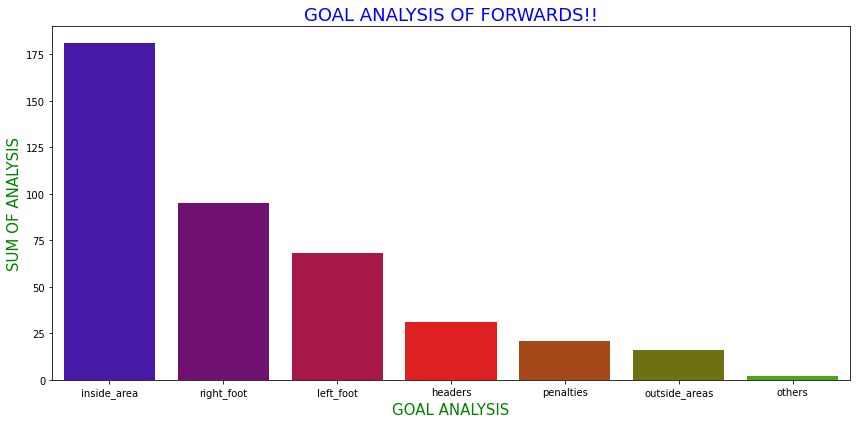

In [96]:
plt.figure(figsize=(12,6))
# make barplot
sns.barplot(x='goal_analysis', y="Forwards",
            data=Fw,
#            label=Fw['goal_analysis'],
            palette='brg',
            ci=None,
            estimator=np.max,
            order=Fw.sort_values('Forwards',ascending=False).goal_analysis)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("SUM OF ANALYSIS",color='g',size=15)
plt.xlabel("GOAL ANALYSIS",color='g',size=15)
plt.title("GOAL ANALYSIS OF FORWARDS!!",color='b',size=18)
plt.tight_layout()
#plt.legend()
plt.savefig("FW_Goal_Analysis_barplot_Seaborn_Python.png", dpi=100)

In [97]:
#fig=px.bar(x=Fw['goal_analysis'],y=Fw['Forwards'],
#          title='GOAL ANALYSIS OF FORWARDS!!',color=Fw['goal_analysis'],text=Fw['Forwards'],
#           labels={'x':'GOAL ANALYSIS','y':'SUM OF ANALYSIS'},color_continuous_scale='rainbow')
#figsize=(25,30)
#fig.show()

### Goal Analysis of Midfielders

In [98]:
#array(['Forward', 'Midfielder', 'Defender', 'total_goal_analysis'],
#      dtype=object)

In [99]:
mf=Gta1.loc['Midfielder']
mf.loc['Midfielders']=(sum(mf['right_foot']),sum(mf['left_foot']),sum(mf['headers']),sum(mf['others']),
sum(mf['inside_area']),sum(mf['outside_areas']),sum(mf['penalties']))
Mf=mf.transpose()
Mf.reset_index(inplace=True)
Mf.rename({'index':'goal_analysis'},axis=1,inplace=True)
Mf


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


position,goal_analysis,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,...,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielder,Midfielders
0,right_foot,3,1,3,1,3,2,4,3,3,...,0,0,0,0,0,0,0,0,0,68
1,left_foot,1,4,3,5,1,3,0,0,0,...,1,1,1,1,0,0,0,0,0,51
2,headers,3,2,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,18
3,others,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,inside_area,7,7,6,3,4,5,3,3,3,...,1,1,0,0,1,1,1,1,1,122
5,outside_areas,0,0,0,3,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,16
6,penalties,0,2,1,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,14


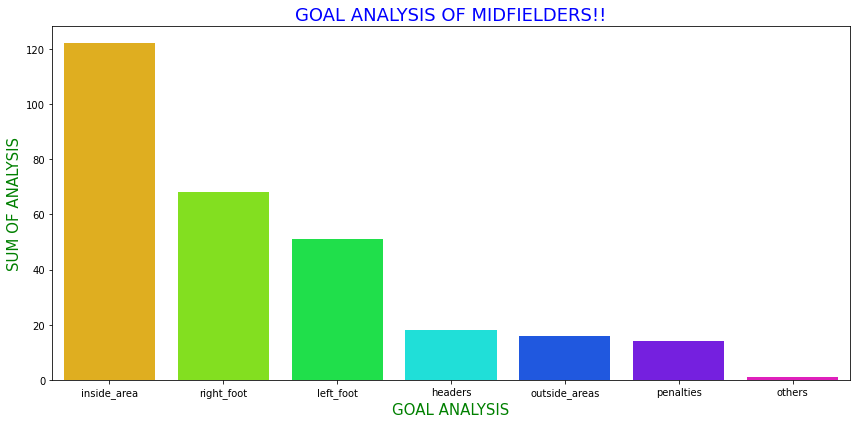

In [100]:
plt.figure(figsize=(12,6))
# make barplot
sns.barplot(x='goal_analysis', y="Midfielders",
            data=Mf,
#            label=Fw['goal_analysis'],
            palette='hsv',
            ci=None,
            estimator=np.max,
            order=Mf.sort_values('Midfielders',ascending=False).goal_analysis)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("SUM OF ANALYSIS",color='g',size=15)
plt.xlabel("GOAL ANALYSIS",color='g',size=15)
plt.title("GOAL ANALYSIS OF MIDFIELDERS!!",color='b',size=18)
plt.tight_layout()
#plt.legend()
plt.savefig("Mf_Goal_Analysis_barplot_Seaborn_Python.png", dpi=100)

In [101]:
#fig=px.bar(x=Mf['goal_analysis'],y=Mf['Midfielders'],
#          title='GOAL ANALYSIS OF MIDFIELDERS!!!',color=Mf['goal_analysis'],text=Mf['Midfielders'],
#           labels={'x':'GOAL ANALYSIS','y':'SUM OF ANALYSIS'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

### Goal Analysis of Defenders

In [102]:
dfd=Gta1.loc['Defender']
dfd.loc['Defenders']=(sum(dfd['right_foot']),sum(dfd['left_foot']),sum(dfd['headers']),sum(dfd['others']),
sum(dfd['inside_area']),sum(dfd['outside_areas']),sum(dfd['penalties']))
Dfd=dfd.transpose()
Dfd.reset_index(inplace=True)
Dfd.rename({'index':'goal_analysis'},axis=1,inplace=True)
Dfd

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


position,goal_analysis,Defender,Defender,Defender,Defender,Defender,Defender,Defender,Defender,Defender,...,Defender,Defender,Defender,Defender,Defender,Defender,Defender,Defender,Defender,Defenders
0,right_foot,2,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,15
1,left_foot,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8
2,headers,0,2,2,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,11
3,others,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,inside_area,1,2,2,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,29
5,outside_areas,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,6
6,penalties,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


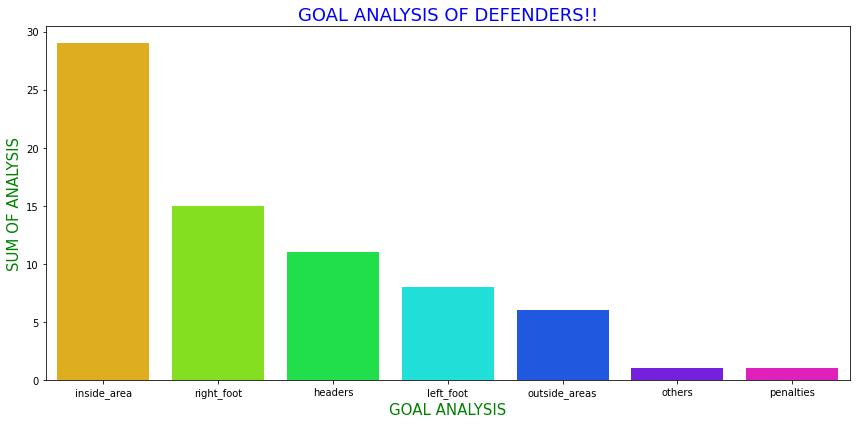

In [103]:
plt.figure(figsize=(12,6))
# make barplot
sns.barplot(x='goal_analysis', y="Defenders",
            data=Dfd,
#            label=Fw['goal_analysis'],
            palette='hsv',
            ci=None,
            estimator=np.max,
            order=Dfd.sort_values('Defenders',ascending=False).goal_analysis)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("SUM OF ANALYSIS",color='g',size=15)
plt.xlabel("GOAL ANALYSIS",color='g',size=15)
plt.title("GOAL ANALYSIS OF DEFENDERS!!",color='b',size=18)
plt.tight_layout()
#plt.legend()
plt.savefig("Dfd_Goal_Analysis_barplot_Seaborn_Python.png", dpi=100)

In [104]:
#fig=px.bar(x=Dfd['goal_analysis'],y=Dfd['Defenders'],
#          title='GOAL ANALYSIS OF DEFENDERS!!!!',color=Dfd['goal_analysis'],text=Dfd['Defenders'],
#           labels={'x':'GOAL ANALYSIS','y':'SUM OF ANALYSIS'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

# Question 8. Top 15 dribblers(PLOT A GRAPH)

In [105]:
dribs=pd.read_csv('attacking.csv')
dribs.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [106]:
dr=dribs.copy()
dr.sort_values('dribbles',ascending=False,inplace=True)
Drb=dr.head(15)
Drb

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
16,12,Coman,Bayern,Forward,3,4,4,59,9
50,24,Salah,Liverpool,Forward,2,0,5,49,13
8,5,Mbappé,Paris,Forward,4,4,8,43,8
107,64,Luis Díaz,Liverpool,Forward,1,0,2,42,13
94,64,Moumi Ngamaleu,Young Boys,Midfielder,1,1,0,34,6
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
40,24,Danjuma,Villarreal,Midfielder,2,3,8,31,11
3,4,Antony,Ajax,Forward,5,3,4,28,7
23,24,Mahrez,Man. City,Midfielder,2,30,5,28,12


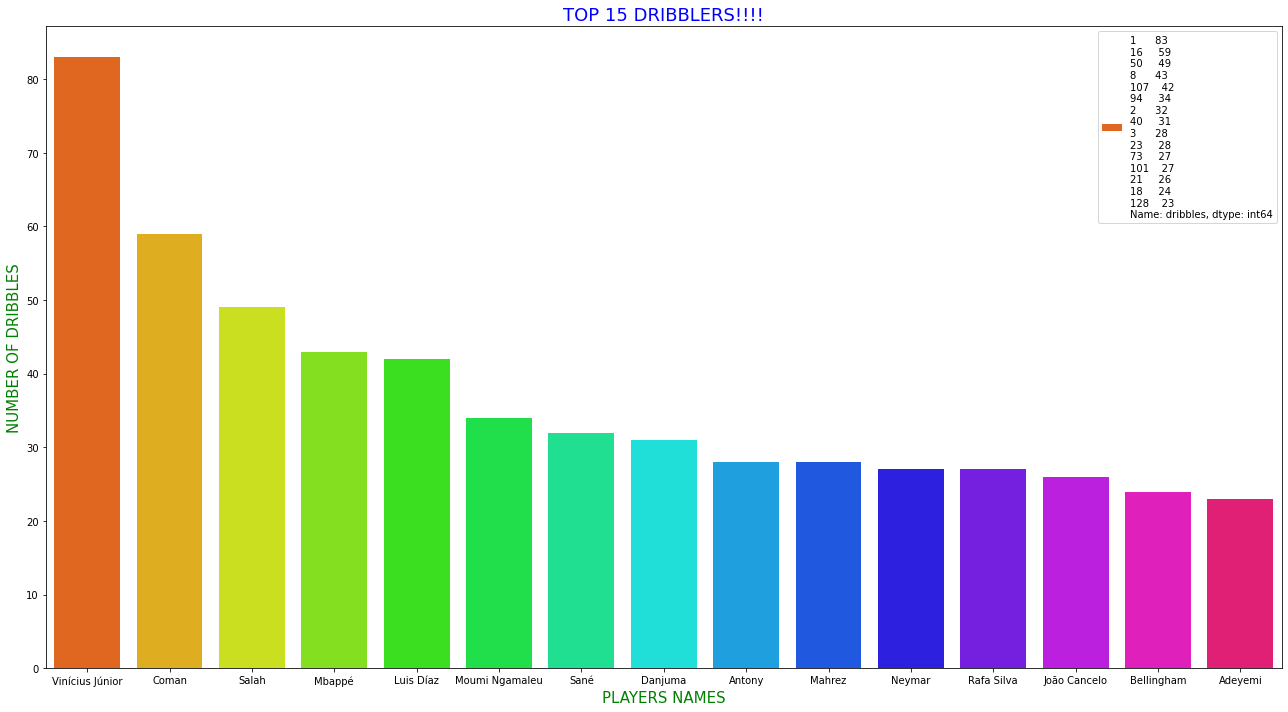

In [107]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='player_name', y="dribbles",
            data=Drb,
            label=Drb['dribbles'],
            palette='hsv',
            ci=None,
            estimator=np.max,
            order=Drb.sort_values('dribbles',ascending=False).player_name)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("NUMBER OF DRIBBLES",color='g',size=15)
plt.xlabel("PLAYERS NAMES",color='g',size=15)
plt.title("TOP 15 DRIBBLERS!!!!",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("Top15_dribblers_barplot_Seaborn_Python.png", dpi=100)

In [108]:
#fig=px.bar(x=Drb['player_name'],y=Drb['dribbles'],
#          title='TOP 15 DRIBBLERS!!!!',color=Drb['club'],text=Drb['player_name'],
#           labels={'x':'PLAYERS REVEILING CLUB NAMES','y':'NUMBER OF DRIBBLES'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()

# Question 9. Top 15 Corner Takers(PLOT A GRAPH)

In [109]:
dribs.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [110]:
ct=dribs.copy()
ct.sort_values('corner_taken',ascending=False,inplace=True)
Ct=ct.head(15)
Ct

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9
11,12,Parejo,Villarreal,Midfielder,3,36,0,4,12
23,24,Mahrez,Man. City,Midfielder,2,30,5,28,12
24,24,Robertson,Liverpool,Defender,2,27,1,9,10
25,24,Ziyech,Chelsea,Midfielder,2,23,0,12,9
5,5,De Bruyne,Man. City,Midfielder,4,18,0,14,10
63,64,Seiwald,Salzburg,Midfielder,1,18,1,5,8
27,24,Tsimikas,Liverpool,Defender,2,16,0,4,5
26,24,Gündoğan,Man. City,Midfielder,2,16,1,3,10
64,64,Berghuis,Ajax,Forward,1,15,2,3,8


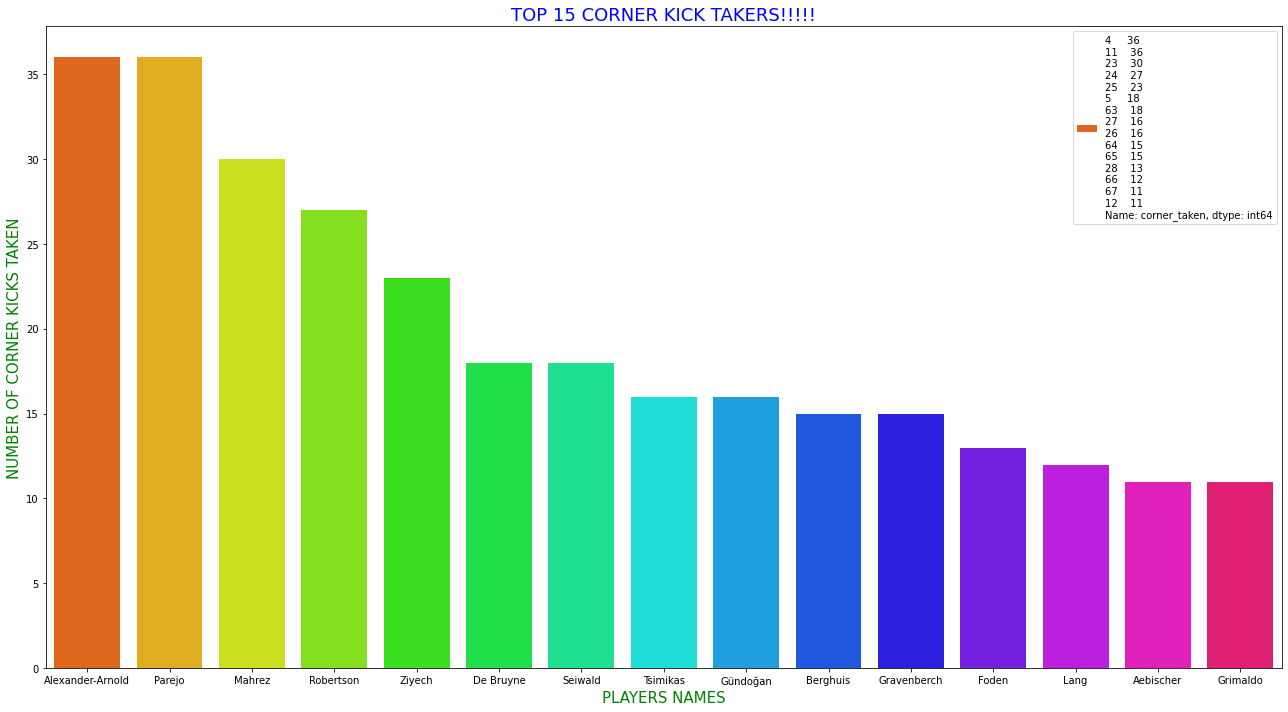

In [111]:
plt.figure(figsize=(18,10))
# make barplot
sns.barplot(x='player_name', y="corner_taken",
            data=Ct,
            label=Ct['corner_taken'],
            palette='hsv',
            ci=None,
            estimator=np.max,
            order=Ct.sort_values('corner_taken',ascending=False).player_name)#in descending order
#           order=df_apt_ext.sort_values('avg_playing_time').player_name)#in ascending order
# set labels
plt.ylabel("NUMBER OF CORNER KICKS TAKEN",color='g',size=15)
plt.xlabel("PLAYERS NAMES",color='g',size=15)
plt.title("TOP 15 CORNER KICK TAKERS!!!!!",color='b',size=18)
plt.tight_layout()
plt.legend()
plt.savefig("Top15_Corner_takers_barplot_Seaborn_Python.png", dpi=100)

In [112]:
#fig=px.bar(x=Ct['player_name'],y=Ct['corner_taken'],
#          title='TOP 15 CORNER KICK TAKERS!!!!',color=Ct['club'],text=Ct['player_name'],
#           labels={'x':'PLAYERS REVEILING THEIR CLUBS','y':'NUMBER OF CORNER-KICKS TAKEN'},color_continuous_scale='earth')
#figsize=(25,30)
#fig.show()